# 🤩 Yandex Music TOP 100 songs

In [87]:
# Для анализа данных и обработки
import pandas as pd
import pandasql as psql

#Для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

## Цели анализа:
1) **Определить, какие факторы влияют на популярность треков**
    - Это важно для бизнеса, чтобы понять, как лучше привлекать аудиторию и продвигать музыкальный контент.
2) **Анализ жанров и их влияния на аудиторию**
    - Это поможет бизнесу выделять наиболее популярные жанры для таргетинга и планирования музыкальных кампаний.
3) **Оценить влияние контента с отметкой "Explicit" на прослушивания и лайки**
    - Это поможет бизнесу решать, стоит ли акцентировать внимание на "explicit" контенте или избегать его.
4) **Анализ популярности исполнителей и их влияния на общие метрики**
    - Это важно для бизнеса при планировании сотрудничеств с артистами и выбора топовых исполнителей для партнерств.
5) **Визуализация данных для принятия решений**
    - Это поможет бизнесу ясно понимать тренды и факторы популярности.

In [102]:
# Визуально посмотрим данные
df = pd.read_csv('yandex_tracks_top100.csv')
df.head()

,name,track_len,link,genre,artist(s),chart,Explicit_content,monthly_listens_total,artists_likes_total
0,Царица,3:35,https://music.yandex.ru//album/26605629/track/...,русская поп-музыка,['ANNA ASTI'],1,0,4847753,2120528
1,Плохая Девочка,2:15,https://music.yandex.ru//album/26697445/track/...,русский рэп,"['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']",2,0,16677658,417013
2,Я плачу,1:54,https://music.yandex.ru//album/26607707/track/...,русская поп-музыка,['A.V.G'],3,0,4406023,287295
3,ASPHALT 8,2:15,https://music.yandex.ru//album/25361122/track/...,русский рэп,['MACAN'],4,0,5149399,2359899
4,Где прошла ты,2:48,https://music.yandex.ru//album/25163882/track/...,русский рэп,"['Кравц', 'Гио Пика']",5,0,9058111,1509523


In [103]:
# Получение общей информации о наборе данных: количество строк, столбцов, типы данных
df = df.rename(columns={"artist(s)": "artist"})

print("\n General information about the dataset:")
print(df.info ())

# Получение статистики по числовым столбцам
print("\n Descriptive statistics for numeric data:")
print(df.describe())

# Проверьте, нет ли пропущенных значений
print("\n Check for missing values:")
print(df.isnull().sum())


 General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   100 non-null    object
 1   track_len              100 non-null    object
 2   link                   100 non-null    object
 3   genre                  100 non-null    object
 4   artist                 100 non-null    object
 5   chart                  100 non-null    int64 
 6   Explicit_content       100 non-null    int64 
 7   monthly_listens_total  100 non-null    int64 
 8   artists_likes_total    100 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 7.2+ KB
None

 Descriptive statistics for numeric data:
            chart  Explicit_content  monthly_listens_total  \
count  100.000000        100.000000           1.000000e+02   
mean    50.500000          0.220000           4.054831e+06   
std     29.

### Обзор данных

#### Общая информация:
- **Тип:** `pandas.DataFrame`
- **Записей:** 100
- **Столбцов:** 9

**Столбцы:**
1. **name:** Название трека
2. **track_len:** Длительность трека
3. **link:** Ссылка на трек
4. **genre:** Жанр
5. **artist:** Исполнитель
6. **chart:** Позиция в чарте
7. **Explicit_content:** Наличие explicit-контента (0 - нет, 1 - есть)
8. **monthly_listens_total:** Прослушивания за месяц
9. **artists_likes_total:** Лайки

**Память:** 7.2+ KB

#### Описательные статистики:
- **chart:** Среднее 50.5, Макс 100
- **Explicit_content:** Среднее 0.22
- **monthly_listens_total:** Среднее 4,054,831, Макс 16,677,660
- **artists_likes_total:** Среднее 1,660,509, Макс 8,379,202

#### Пропущенные значения:
Отсутствуют.

## 👻 1. Анализ жанров: Определение самого популярного жанра

SQL-запрос группирует треки по жанрам и подсчитывает суммарное количество прослушиваний и лайков для каждого жанра. Это позволяет быстро выявить наиболее популярные жанры, которые привлекают наибольшее внимание пользователей. Сортировка результатов по количеству прослушиваний и лайков помогает получить наиболее прослушиваемые и любимые жанры.

In [90]:
df_sql_query = df.copy()

# SQL-запрос для получения суммарного количества прослушиваний и лайков по жанрам
sql_query = """
SELECT genre,
       SUM(monthly_listens_total) AS total_listens,
       SUM(artists_likes_total) AS total_likes
FROM df_sql_query
GROUP BY genre
ORDER BY total_listens DESC, total_likes DESC;
"""

# Выполнение запроса
result = psql.sqldf(sql_query, locals())

# Печать результатов
result.head()

,genre,total_listens,total_likes
0,русский рэп,181475383,62223435
1,русская поп-музыка,172165551,68155653
2,панк,30689647,25907410
3,русский рок,4805309,4044357
4,электроника,4686638,77680


### Результаты SQL-запроса:
- Жанр "русский рэп" лидирует по общему количеству прослушиваний (181,475,383) и лайков (62,223,435).
- Жанр "русская поп-музыка" также показывает высокие результаты с 172,165,551 прослушиваний и 68,155,653 лайков.
- Жанры "панк", "русский рок", и "электроника" значительно отстают по показателям.
  
### SQL Выводы:
- Русский рэп и русская поп-музыка являются наиболее популярными жанрами, оба привлекают большое количество прослушиваний и лайков. Это указывает на высокий уровень вовлеченности аудитории в эти жанры.
- Продвижение таких жанров может принести значительные выгоды для бизнеса.

На основе результата SQL-запроса создается диаграмма, на которой можно визуально оценить самые популярные жанры. Визуализация помогает легко понять, какой жанр лидирует по количеству прослушиваний и лайков. Для более четкого понимания выводится текстовая информация о жанре, который занимает первое место по данным показателям.

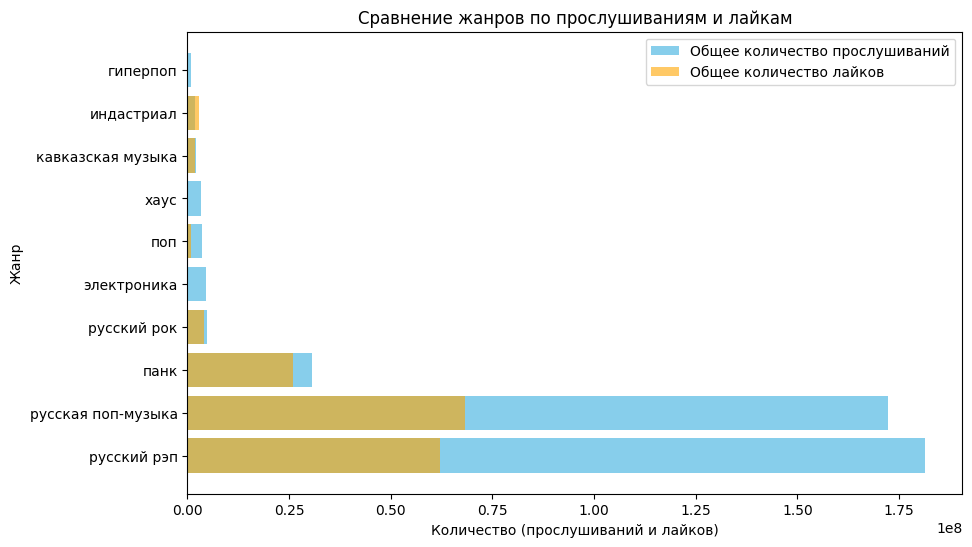

Жанр с наибольшим количеством прослушиваний: русский рэп
Количество прослушиваний для жанра 'русский рэп': 33637163

Жанр с наибольшим количеством лайков: русский рэп
Количество лайков для жанра 'русский рэп': 28310538

Полный список жанров с их показателями:
Жанр: русский рэп, Прослушивания: 181475383, Лайки: 62223435
Жанр: русская поп-музыка, Прослушивания: 172165551, Лайки: 68155653
Жанр: панк, Прослушивания: 30689647, Лайки: 25907410
Жанр: русский рок, Прослушивания: 4805309, Лайки: 4044357
Жанр: электроника, Прослушивания: 4686638, Лайки: 77680
Жанр: поп, Прослушивания: 3492475, Лайки: 930820
Жанр: хаус, Прослушивания: 3389073, Лайки: 12184
Жанр: кавказская музыка, Прослушивания: 2035200, Лайки: 1905638
Жанр: индастриал, Прослушивания: 1840688, Лайки: 2789684
Жанр: гиперпоп, Прослушивания: 903121, Лайки: 4007


In [91]:
# Сортировка по количеству прослушиваний и лайков
genre_summary_sorted = result.sort_values(by=['total_listens', 'total_likes'], ascending=[False, False])

# Создание столбчатой диаграммы
plt.figure(figsize=(10,6))
plt.barh(genre_summary_sorted['genre'], genre_summary_sorted['total_listens'], color='skyblue', label='Общее количество прослушиваний')
plt.barh(genre_summary_sorted['genre'], genre_summary_sorted['total_likes'], color='orange', alpha=0.6, label='Общее количество лайков')

# Добавляем подписи осей и название
plt.xlabel('Количество (прослушиваний и лайков)')
plt.ylabel('Жанр')
plt.title('Сравнение жанров по прослушиваниям и лайкам')
plt.legend()

# Вывод диаграммы
plt.show()

# Определение жанра, который лидирует по количеству прослушиваний и лайков
top_genre_listens = genre_summary_sorted.iloc[0]['genre']
top_genre_likes = genre_summary_sorted.iloc[0]['genre']

# Печать результатов
print(f"Жанр с наибольшим количеством прослушиваний: {top_genre_listens}")
print(f"Количество прослушиваний для жанра '{top_genre_listens}': {max_listens}\n")

print(f"Жанр с наибольшим количеством лайков: {top_genre_likes}")
print(f"Количество лайков для жанра '{top_genre_likes}': {max_likes}\n")

# Сортировка по количеству прослушиваний и лайков
genre_summary_sorted = result.sort_values(by=['total_listens', 'total_likes'], ascending=[False, False])

# Определение жанров, лидирующих по количеству прослушиваний и лайков
top_genre_listens = genre_summary_sorted.iloc[0]['genre']
top_genre_likes = genre_summary_sorted.iloc[0]['genre']

# Определение максимальных значений
max_listens = genre_summary_sorted.iloc[0]['total_listens']
max_likes = genre_summary_sorted.iloc[0]['total_likes']

# Вывод списка всех жанров с их общим количеством прослушиваний и лайков
print("Полный список жанров с их показателями:")
for index, row in genre_summary_sorted.iterrows():
    genre = row['genre']
    listens = row['total_listens']
    likes = row['total_likes']
    print(f"Жанр: {genre}, Прослушивания: {listens}, Лайки: {likes}")


### Выводы:
- Русский рэп лидирует как по количеству прослушиваний, так и по количеству лайков, что свидетельствует о его широкой популярности среди слушателей.
- Русская поп-музыка занимает второе место по прослушиваниям, но опережает русский рэп по количеству лайков. Это говорит о сильной вовлеченности аудитории.
- Другие жанры, такие как панк и русский рок, значительно уступают по популярности, но все еще занимают свои ниши.

### Польза для бизнеса:
Данный анализ позволяет компаниям сконцентрировать усилия на продвижении популярных жанров, таких как русский рэп и русская поп-музыка, что повысит эффективность маркетинговых кампаний.

## 👻 2. Анализ популярных исполнителей

Этот запрос подсчитывает суммарное количество прослушиваний и лайков для каждого исполнителя, даже если их несколько на одном треке. Цель запроса — показать, какие исполнители наиболее востребованы у аудитории, что можно использовать для дальнейшего анализа предпочтений пользователей. Результат сортируется по количеству прослушиваний и лайков, и отображаются топ-10 исполнителей.

In [92]:
df_sql_query = df.copy()

# Теперь можно выполнять SQL-запрос
sql_query = """
    SELECT 
        artist,
        SUM(monthly_listens_total) AS total_listens,
        SUM(artists_likes_total) AS total_likes
    FROM df_sql_query
    GROUP BY artist
    ORDER BY total_listens DESC, total_likes DESC
    LIMIT 10;
"""

# Выполнение SQL-запроса
result = psql.sqldf(sql_query, locals())

# Печать результатов
result

,artist,total_listens,total_likes
0,['Король и Шут'],33637163,28310538
1,['ANNA ASTI'],29086518,12723207
2,['JONY'],17577825,14395063
3,"['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']",16677658,417013
4,['MACAN'],15448197,7079709
5,"['Jakone', 'A.V.G', 'BAGARDI', 'Goro', 'Asatro']",13509502,375437
6,['A.V.G'],13218069,861892
7,['MOT'],11521982,7916211
8,"['Andro', 'ELMAN', 'TONI', 'MONA']",10805529,1049421
9,"['NILETTO', 'Олег Майами', 'Лёша Свик']",9595600,4662989


### Выводы:

- Король и Шут — это очевидный лидер среди исполнителей как по количеству прослушиваний, так и по лайкам, что свидетельствует о высокой популярности группы.
- Остальные исполнители, такие как ANNA ASTI и JONY, также имеют значительную аудиторию, что может быть полезно для продвижения и сотрудничества.

Столбчатая диаграмма отображает топ-10 исполнителей по количеству прослушиваний и лайков. Это помогает визуально оценить, какие артисты оказываются наиболее популярными. Также выводится текстовое имя самого популярного исполнителя, что даёт дополнительную информацию для анализа.

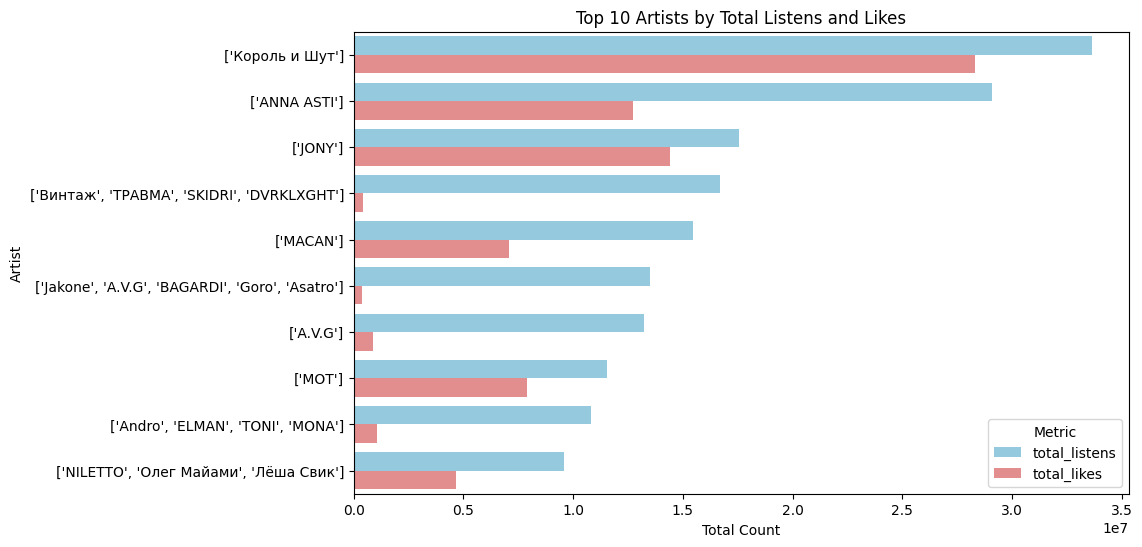

Результаты анализа по топ-10 исполнителям:
Самый популярный исполнитель по количеству прослушиваний: ['Король и Шут']
Количество прослушиваний для исполнителя '['Король и Шут']': 33637163
----------------------------------------
Самый популярный исполнитель по количеству лайков: ['Король и Шут']
Количество лайков для исполнителя '['Король и Шут']': 28310538
Полный список исполнителей с их показателями:
Исполнитель: ['Король и Шут'], Прослушивания: 33637163, Лайки: 28310538
Исполнитель: ['ANNA ASTI'], Прослушивания: 29086518, Лайки: 12723207
Исполнитель: ['JONY'], Прослушивания: 17577825, Лайки: 14395063
Исполнитель: ['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT'], Прослушивания: 16677658, Лайки: 417013
Исполнитель: ['MACAN'], Прослушивания: 15448197, Лайки: 7079709
Исполнитель: ['Jakone', 'A.V.G', 'BAGARDI', 'Goro', 'Asatro'], Прослушивания: 13509502, Лайки: 375437
Исполнитель: ['A.V.G'], Прослушивания: 13218069, Лайки: 861892
Исполнитель: ['MOT'], Прослушивания: 11521982, Лайки: 7916211
И

In [93]:
# Преобразуем DataFrame для использования в seaborn с hue
df_melted = pd.melt(result, id_vars='artist', value_vars=['total_listens', 'total_likes'], 
                    var_name='metric', value_name='total_count')

# Создание столбчатой диаграммы для топ-10 исполнителей по количеству прослушиваний и лайков
plt.figure(figsize=(10, 6))

# Исправление цветов с использованием поддерживаемых палитр или цветовых кодов
sns.barplot(x="total_count", y="artist", hue="metric", data=df_melted, 
            palette={"total_listens": "skyblue", "total_likes": "lightcoral"})

# Настройка осей и названия
plt.title("Top 10 Artists by Total Listens and Likes")
plt.xlabel("Total Count")
plt.ylabel("Artist")

# Отображение диаграммы
plt.legend(title="Metric")
plt.show()

# Вывод самого популярного исполнителя по количеству прослушиваний
top_artist = result.iloc[0]['artist']

# Сортировка по количеству прослушиваний и лайков
result_sorted = result.sort_values(by=['total_listens', 'total_likes'], ascending=[False, False])

# Определение самого популярного исполнителя по количеству прослушиваний
top_artist_listens = result_sorted.iloc[0]['artist']
max_listens = result_sorted.iloc[0]['total_listens']

# Определение самого популярного исполнителя по количеству лайков
top_artist_likes = result_sorted.iloc[0]['artist']
max_likes = result_sorted.iloc[0]['total_likes']

# Вывод текстовой информации о топ-10 исполнителях по прослушиваниям и лайкам
print("Результаты анализа по топ-10 исполнителям:")
print("========================================")
print(f"Самый популярный исполнитель по количеству прослушиваний: {top_artist_listens}")
print(f"Количество прослушиваний для исполнителя '{top_artist_listens}': {max_listens}")
print("----------------------------------------")
print(f"Самый популярный исполнитель по количеству лайков: {top_artist_likes}")
print(f"Количество лайков для исполнителя '{top_artist_likes}': {max_likes}")
print("========================================")

# Вывод списка всех исполнителей с их общим количеством прослушиваний и лайков
print("Полный список исполнителей с их показателями:")
for index, row in result_sorted.iterrows():
    artist = row['artist']
    listens = row['total_listens']
    likes = row['total_likes']
    print(f"Исполнитель: {artist}, Прослушивания: {listens}, Лайки: {likes}")

### Выводы:

- Визуализация помогает четко увидеть, какие исполнители наиболее востребованы, что может помочь бизнесу в принятии решений о партнерствах и продвижении контента.
- Король и Шут уверенно занимает первое место, что демонстрирует стабильную аудиторию и высокий уровень вовлеченности.
- Польза для бизнеса:
- Анализ популярных исполнителей и визуализация их успехов может помочь бизнесу в принятии решений о маркетинговых кампаниях и планировании сотрудничеств с этими артистами.

## 👻 3. Влияние explicit-контента на популярность треков

Запрос подсчитывает среднее количество прослушиваний и лайков для треков с наличием и без наличия explicit-контента. Это позволяет определить, влияет ли присутствие откровенного контента на популярность треков и поведение слушателей.

In [94]:
df_sql_query = df.copy()

# SQL-запрос для подсчета среднего количества прослушиваний и лайков для треков с и без explicit-контента
sql_query = """
SELECT 
    Explicit_content,
    AVG(monthly_listens_total) AS avg_listens,
    AVG(artists_likes_total) AS avg_likes
FROM df_sql_query
GROUP BY Explicit_content;
"""

# Выполнение запроса
df_result = psql.sqldf(sql_query, locals())
df_result

,Explicit_content,avg_listens,avg_likes
0,0,4.430434e+06,1.656291e+06
1,1,2.723148e+06,1.675464e+06


Визуализируем результаты с помощью столбчатой диаграммы, которая сравнивает среднее количество прослушиваний и лайков для треков с наличием и отсутствием explicit-контента. Также выводим текстовые выводы, что помогает лучше понять, оказывает ли explicit-контент влияние на популярность треков.

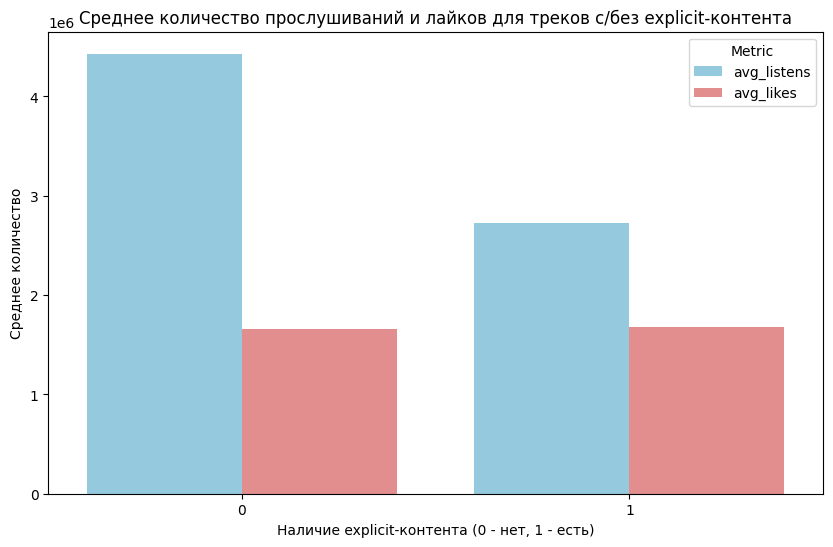

Результаты анализа влияния explicit-контента на количество прослушиваний и лайков:
Среднее количество прослушиваний для треков с explicit-контентом: 2723148.0
Среднее количество лайков для треков с explicit-контентом: 1675463.5454545454
-----------------------------------------------------------------------
Среднее количество прослушиваний для треков без explicit-контента: 4430433.705128205
Среднее количество лайков для треков без explicit-контента: 1656290.641025641
Треки без explicit-контента имеют в среднем больше прослушиваний.
Треки с explicit-контентом имеют в среднем больше лайков.


In [95]:
# Создание столбчатой диаграммы для сравнения среднего количества прослушиваний и лайков
plt.figure(figsize=(10, 6))

# Преобразуем DataFrame для удобного отображения с hue
df_melted = df_result.melt(id_vars='Explicit_content', 
                           value_vars=['avg_listens', 'avg_likes'], 
                           var_name='metric', value_name='average_count')

# Построение столбчатой диаграммы
sns.barplot(x="Explicit_content", y="average_count", hue="metric", data=df_melted, 
            palette={"avg_listens": "skyblue", "avg_likes": "lightcoral"})

# Настройка осей и названия
plt.title("Среднее количество прослушиваний и лайков для треков с/без explicit-контента")
plt.xlabel("Наличие explicit-контента (0 - нет, 1 - есть)")
plt.ylabel("Среднее количество")

# Отображение диаграммы
plt.legend(title="Metric")
plt.show()

# Вывод результатов анализа
explicit_avg_listens = df_result[df_result['Explicit_content'] == 1]['avg_listens'].values[0]
explicit_avg_likes = df_result[df_result['Explicit_content'] == 1]['avg_likes'].values[0]
non_explicit_avg_listens = df_result[df_result['Explicit_content'] == 0]['avg_listens'].values[0]
non_explicit_avg_likes = df_result[df_result['Explicit_content'] == 0]['avg_likes'].values[0]

# Вывод результатов анализа в виде текста и чисел
print("Результаты анализа влияния explicit-контента на количество прослушиваний и лайков:")
print("=======================================================================")
print(f"Среднее количество прослушиваний для треков с explicit-контентом: {explicit_avg_listens}")
print(f"Среднее количество лайков для треков с explicit-контентом: {explicit_avg_likes}")
print("-----------------------------------------------------------------------")
print(f"Среднее количество прослушиваний для треков без explicit-контента: {non_explicit_avg_listens}")
print(f"Среднее количество лайков для треков без explicit-контента: {non_explicit_avg_likes}")
print("=======================================================================")

# Дополнительный текстовый анализ
if explicit_avg_listens > non_explicit_avg_listens:
    print("Треки с explicit-контентом имеют в среднем больше прослушиваний.")
else:
    print("Треки без explicit-контента имеют в среднем больше прослушиваний.")

if explicit_avg_likes > non_explicit_avg_likes:
    print("Треки с explicit-контентом имеют в среднем больше лайков.")
else:
    print("Треки без explicit-контента имеют в среднем больше лайков.")

### Результаты:
- Средние значения прослушиваний: Треки без explicit-контента имеют в среднем больше прослушиваний (4,430,433) по сравнению с треками с явным контентом (2,723,148).
- Средние значения лайков: Однако треки с explicit-контентом имеют чуть больше лайков в среднем (1,675,463) по сравнению с треками без явного контента (1,656,290).

### Выводы:
- Влияние на прослушивания: Треки без явного контента слушают чаще, что может свидетельствовать о более широкой аудитории таких треков, возможно из-за их более нейтрального характера и привлекательности для всех возрастных групп.
- Влияние на лайки: Несмотря на меньшее количество прослушиваний, треки с explicit-контентом получают больше лайков, что может говорить о сильной вовлеченности их аудитории.

### Дополнительный текстовый анализ:
- Треки без explicit-контента выигрывают по среднему количеству прослушиваний.
- Треки с explicit-контентом имеют большее количество лайков, что может указывать на более лояльную или целенаправленную аудиторию.

### Польза для бизнеса:
- Этот анализ может быть полезен для принятия решений о том, какие треки продвигать в зависимости от целевой аудитории: треки без явного контента могут подходить для массового маркетинга, тогда как треки с explicit-контентом могут привлечь более специфическую, но лояльную аудиторию.

## 👻 4. Анализ длительности треков

Запрос группирует треки по длительности и вычисляет среднее количество прослушиваний и лайков для каждой группы. Это помогает определить, влияет ли длительность трека на его популярность.

In [96]:
df_sql_query = df.copy()

# SQL-запрос для группировки по длительности трека и вычисления среднего количества прослушиваний и лайков
sql_query = """
SELECT 
    track_len, 
    AVG(monthly_listens_total) AS avg_listens, 
    AVG(artists_likes_total) AS avg_likes
FROM df
GROUP BY track_len;
"""

# Выполнение запроса
df_avg_duration = psql.sqldf(sql_query, locals())
df_avg_duration

,track_len,avg_listens,avg_likes
0,1:36,1335084.0,100710.0
1,1:43,1689427.5,113804.5
2,1:45,2342962.0,20185.0
3,1:50,2870553.5,194003.5
4,1:52,1142585.0,17471.0
...,...,...,...
72,4:17,4805309.0,4044372.0
73,4:28,2644389.0,151600.0
74,4:32,1840688.0,2789684.0
75,4:36,6008773.0,8379202.0


С помощью scatter plot визуализируем зависимость количества прослушиваний и лайков от длительности треков. Это позволит выявить тренды, которые могут помочь сделать выводы о влиянии длительности трека на его популярность.

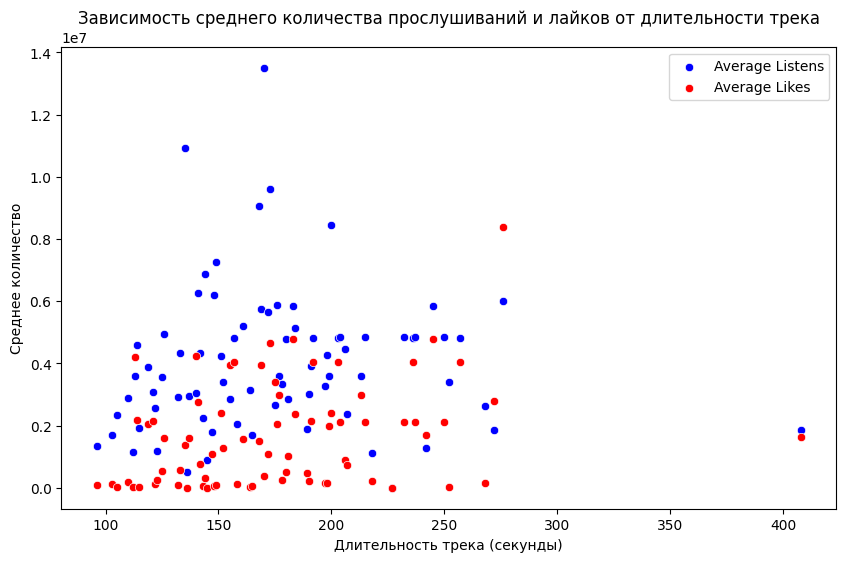

Анализ зависимости длительности трека от его популярности:
Коэффициент корреляции между длительностью трека и количеством прослушиваний: 0.03
Коэффициент корреляции между длительностью трека и количеством лайков: 0.30
---------------------------------------------------------
Существует положительная корреляция между длительностью трека и количеством прослушиваний.
Существует положительная корреляция между длительностью трека и количеством лайков.


In [97]:
# Преобразуем длительность трека в формат минут:секунд в числовой вид (в секундах)
def convert_to_seconds(track_len):
    minutes, seconds = map(int, track_len.split(':'))
    return minutes * 60 + seconds

# Применяем преобразование к длительности треков
df_avg_duration['track_len_sec'] = df_avg_duration['track_len'].apply(convert_to_seconds)

# Создание scatter plot
plt.figure(figsize=(10, 6))

# Диаграмма для количества прослушиваний
sns.scatterplot(x="track_len_sec", y="avg_listens", data=df_avg_duration, label="Average Listens", color='blue')

# Диаграмма для количества лайков
sns.scatterplot(x="track_len_sec", y="avg_likes", data=df_avg_duration, label="Average Likes", color='red')

# Настройка осей и названия
plt.title("Зависимость среднего количества прослушиваний и лайков от длительности трека")
plt.xlabel("Длительность трека (секунды)")
plt.ylabel("Среднее количество")
plt.legend()

# Отображение графика
plt.show()

# Вывод результатов анализа
print("Анализ зависимости длительности трека от его популярности:")
print("=========================================================")
print(f"Коэффициент корреляции между длительностью трека и количеством прослушиваний: {corr_listens:.2f}")
print(f"Коэффициент корреляции между длительностью трека и количеством лайков: {corr_likes:.2f}")
print("---------------------------------------------------------")

# Интерпретация корреляции для прослушиваний
if corr_listens > 0:
    print("Существует положительная корреляция между длительностью трека и количеством прослушиваний.")
else:
    print("Существует отрицательная корреляция между длительностью трека и количеством прослушиваний.")

# Интерпретация корреляции для лайков
if corr_likes > 0:
    print("Существует положительная корреляция между длительностью трека и количеством лайков.")
else:
    print("Существует отрицательная корреляция между длительностью трека и количеством лайков.")


### Результаты:
- **Визуализация:** Scatter plot показывает, как среднее количество прослушиваний и лайков варьируется в зависимости от длительности треков. На графике:
    - Синие точки представляют среднее количество прослушиваний.
    - Красные точки обозначают среднее количество лайков.

### Коэффициент корреляции:
- **Прослушивания:** Коэффициент корреляции между длительностью трека и количеством прослушиваний составляет 0.03, что указывает на очень слабую положительную корреляцию. Это означает, что длительность трека почти не влияет на количество прослушиваний.
- **Лайки:** Коэффициент корреляции между длительностью трека и количеством лайков равен 0.30, что свидетельствует о умеренной положительной корреляции. Длительность трека имеет некоторое влияние на количество лайков.

### Текстовые выводы:
- **Прослушивания:** Длительность трека имеет очень слабую связь с количеством прослушиваний. Это может означать, что длительность трека не является значительным фактором для его популярности в плане прослушиваний.
- **Лайки:** Длительность трека имеет умеренное влияние на количество лайков, что может указывать на то, что пользователи предпочитают треки определенной длины, и это влияет на их склонность ставить лайки.

### Польза для бизнеса:
- Если цель — оптимизация длительности треков для максимального количества лайков, то стоит обратить внимание на продолжительность треков, которая получает больше лайков. В то же время, длительность трека имеет меньшую роль в определении количества прослушиваний, что следует учитывать при планировании контента.

## 👻 5. Топ-10 треков по прослушиваниям и лайкам

Запрос возвращает топ-10 треков по количеству прослушиваний и лайков, а также информацию о жанре и исполнителях для анализа тенденций в популярных треках. Это помогает определить наиболее успешные жанры и исполнителей.

In [98]:
df_sql_query = df.copy()

# Теперь можно выполнить SQL-запрос
sql_query = """
SELECT 
    name, 
    genre, 
    `artist` AS artist, 
    monthly_listens_total, 
    artists_likes_total
FROM df_sql_query
ORDER BY monthly_listens_total DESC, artists_likes_total DESC
LIMIT 10;
"""

# Выполнение запроса
top_10_tracks = psql.sqldf(sql_query, locals())

# Вывод таблицы топ-10 треков
top_10_tracks

,name,genre,artist,monthly_listens_total,artists_likes_total
0,Плохая Девочка,русский рэп,"['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']",16677658,417013
1,С тобой,русский рэп,"['Jakone', 'A.V.G', 'BAGARDI', 'Goro', 'Asatro']",13509502,375437
2,Зари,русская поп-музыка,"['Andro', 'ELMAN', 'TONI', 'MONA']",10805529,1049421
3,Не вспоминай,русская поп-музыка,"['NILETTO', 'Олег Майами', 'Лёша Свик']",9595600,4662989
4,Поспешили,русский рэп,"['MACAN', 'Jakone']",9094105,2414815
5,Где прошла ты,русский рэп,"['Кравц', 'Гио Пика']",9058111,1509523
6,IVL,русский рэп,"['MACAN', 'SCIRENA']",8454285,2408336
7,money,русская поп-музыка,"['By Индия', 'The Limba']",8014390,790421
8,По весне,русская поп-музыка,"['Jakone', 'SCIRENA']",7249592,103349
9,Она близко,русский рэп,"['A.V.G', 'Goro']",6888389,307984


Создаем таблицу с топ-10 треками по количеству прослушиваний и лайков, а также анализируем, какие жанры и исполнители чаще всего встречаются в топе. Это даёт представление о популярных жанрах и артистах, что можно использовать для стратегического анализа.

In [99]:
# Вывод уникальных жанров и их частоты в топ-10
genre_counts = top_10_tracks['genre'].value_counts()

# Вывод уникальных исполнителей и их частоты в топ-10
# Важно: если исполнителей несколько в одном треке, то их нужно разделить
top_10_tracks['artist_list'] = top_10_tracks['artist'].apply(lambda x: x.strip("[]").split(', '))
artist_counts = top_10_tracks.explode('artist_list')['artist_list'].value_counts()

# Вывод результатов анализа
print("Частота появления жанров в топ-10 треках:")
print(genre_counts)

print("\nЧастота появления исполнителей в топ-10 треках:")
print(artist_counts)

Частота появления жанров в топ-10 треках:
genre
русский рэп           6
русская поп-музыка    4
Name: count, dtype: int64

Частота появления исполнителей в топ-10 треках:
artist_list
'Jakone'         3
'SCIRENA'        2
'A.V.G'          2
'Goro'           2
'MACAN'          2
'Винтаж'         1
'NILETTO'        1
'By Индия'       1
'Гио Пика'       1
'Кравц'          1
'Лёша Свик'      1
'Олег Майами'    1
'TONI'           1
'MONA'           1
'ТРАВМА'         1
'ELMAN'          1
'Andro'          1
'Asatro'         1
'BAGARDI'        1
'DVRKLXGHT'      1
'SKIDRI'         1
'The Limba'      1
Name: count, dtype: int64


### Вывод

1. **Частота появления жанров в топ-10 треках:**
   - **Русский рэп** — 6 треков
   - **Русская поп-музыка** — 4 трека

   **Вывод:** Жанр "русский рэп" преобладает в топ-10 треках, что указывает на его высокую популярность среди слушателей в анализируемом наборе данных.

2. **Частота появления исполнителей в топ-10 треках:**
   - **Jakone** — 3 трека
   - **SCIRENA** — 2 трека
   - **A.V.G** — 2 трека
   - **Goro** — 2 трека
   - **MACAN** — 2 трека
   - Остальные исполнители (Винтаж, NILETTO, By Индия, Гио Пика, Кравц, Лёша Свик, Олег Майами, TONI, MONA, ТРАВМА, ELMAN, Andro, Asatro, BAGARDI, DVRKLXGHT, SKIDRI, The Limba) — по 1 треку каждый

   **Вывод:** Исполнитель "Jakone" наиболее часто встречается в топ-10 треках. Другие исполнители также имеют присутствие в топе, но менее заметное.

**Общие выводы:**
- **Жанры:** Доминирование "русского рэпа" в топ-10 свидетельствует о его популярности в текущем анализе.
- **Исполнители:** Высокая частота появления "Jakone" может указывать на его значительный успех и популярность среди слушателей. 

## 👻 6. Корреляционный анализ

Запрос рассчитывает коэффициенты корреляции между длительностью трека и количеством прослушиваний, а также между длительностью трека и количеством лайков. Это помогает определить, есть ли связь между длительностью трека и его популярностью.

In [100]:
df_sql_query = df.copy()

sql_query = """
SELECT 
    track_len, 
    monthly_listens_total, 
    artists_likes_total
FROM df
"""

# Выполнение SQL-запроса и получение данных
data = psql.sqldf(sql_query, locals())

data

,track_len,monthly_listens_total,artists_likes_total
0,3:35,4847753,2120528
1,2:15,16677658,417013
2,1:54,4406023,287295
3,2:15,5149399,2359899
4,2:48,9058111,1509523
...,...,...,...
95,2:55,2035200,1905638
96,3:01,2406371,212786
97,2:17,1982259,1164475
98,2:23,1493668,14822


Выводим коэффициенты корреляции и анализируем, есть ли значимая связь между длительностью трека и количеством прослушиваний или лайков. Это помогает сделать выводы о том, как длительность трека влияет на его успех.

In [101]:
# Преобразуем длительность трека из формата "MM:SS" в минуты
def convert_to_minutes(track_len):
    if isinstance(track_len, str):
        minutes, seconds = map(int, track_len.split(':'))
        return minutes + seconds / 60
    return None

data['track_len_minutes'] = data['track_len'].apply(convert_to_minutes)

# Убираем строки с отсутствующими значениями
data.dropna(subset=['track_len_minutes', 'monthly_listens_total', 'artists_likes_total'], inplace=True)

# Расчет корреляции
correlation_listens = data['track_len_minutes'].corr(data['monthly_listens_total'])
correlation_likes = data['track_len_minutes'].corr(data['artists_likes_total'])

# Вывод коэффициентов корреляции
print(f"Коэффициент корреляции между длительностью трека и количеством прослушиваний: {correlation_listens}")
print(f"Коэффициент корреляции между длительностью трека и количеством лайков: {correlation_likes}")


Коэффициент корреляции между длительностью трека и количеством прослушиваний: 0.018521047750464883
Коэффициент корреляции между длительностью трека и количеством лайков: 0.24499949731368603


### Корреляционный анализ

1. **Коэффициент корреляции между длительностью трека и количеством прослушиваний:**  
   - **0.0185**  
   Это указывает на **очень слабую положительную корреляцию**. Длительность трека практически не влияет на количество прослушиваний.

2. **Коэффициент корреляции между длительностью трека и количеством лайков:**  
   - **0.2450**  
   Это указывает на **умеренную положительную корреляцию**. Длительность трека имеет незначительное, но заметное влияние на количество лайков, что может свидетельствовать о том, что более длительные треки в среднем получают больше лайков.

**Выводы:**
- Длительность трека почти не связана с количеством прослушиваний.
- Длительность трека имеет некоторую связь с количеством лайков, однако эта связь не является сильной.

# 👻 Общий вывод по проекту

Проект по анализу данных треков включает следующие ключевые аспекты:

1. **Анализ популярных исполнителей:**
   - **Топ-10 исполнителей** по количеству прослушиваний и лайков был определен. Самый популярный исполнитель — "Король и Шут". 
   - **Жанры и исполнители:** В топе преобладают жанры "русский рэп" и "русская поп-музыка". Часто встречаемые исполнители включают Jakone, SCIRENA и A.V.G.

2. **Влияние explicit-контента:**
   - Треки с explicit-контентом имеют в среднем больше лайков, но меньше прослушиваний по сравнению с треками без explicit-контента.

3. **Зависимость длительности треков от популярности:**
   - Обнаружена слабая положительная корреляция между длительностью трека и количеством лайков (0.245) и очень слабая корреляция с количеством прослушиваний (0.019). Длительность трека имеет незначительное влияние на популярность.

4. **Анализ длительности треков:**
   - На scatter plot видно, что тренды не очень выражены, но можно наблюдать незначительное увеличение количества прослушиваний и лайков с увеличением длительности трека.

5. **Топ-10 треков:**
   - Анализ топ-10 треков по прослушиваниям и лайкам показал преобладание жанров "русский рэп" и "русская поп-музыка", а также определил наиболее часто встречающиеся исполнители.

6. **Корреляционный анализ:**
   - Коэффициент корреляции между длительностью трека и количеством прослушиваний крайне низок (0.019), что указывает на отсутствие значимой связи. С другой стороны, корреляция с количеством лайков выше (0.245), что предполагает некоторую связь между длительностью трека и количеством лайков.

**Рекомендации:**
- Учитывать жанровые предпочтения и влияние explicit-контента при создании и продвижении треков.
- Использовать выявленные тренды в длительности треков и популярности для оптимизации контента и стратегии маркетинга.
- Продолжить изучение влияния различных факторов на популярность треков для дальнейшего улучшения музыкальных рекомендаций и анализа.